### Complejidad - Práctico 5 - Percolación
#### Lautaro Giordano

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import sys

sys.setrecursionlimit(500000)

In [58]:
def armar_red(size, p):
    # Armo una grilla size x size donde es 0 (negro) con probabilidad p
    red = np.random.rand(size, size) < 1-p
    return red

# Funcion para detectar clusters de una red:
def detectar_cluster(red_aux, x, y, cluster):
    if (x < 0 or x > len(red_aux) - 1 or y < 0 or y > len(red_aux[0]) - 1 or red_aux[x][y] == 1):
        return
    
    else:
        cluster.append([x,y])
        red_aux[x][y] = -1
        detectar_cluster(red_aux, x+1, y, cluster)
        detectar_cluster(red_aux, x-1, y, cluster)
        detectar_cluster(red_aux, x, y+1, cluster)
        detectar_cluster(red_aux, x, y-1, cluster)

# Funcion que recorre la red y guarda todos los clusters en una lista
def lista_clusters(red):
    clusters = []
    # Me hago una copia de la red porque voy a borrar los clusters despues de detectarlos
    red_aux = red.copy()
    for x in range(len(red)):
        for y in range(len(red[0])):
            if red_aux[x][y] == 0:
                cluster = []
                detectar_cluster(red_aux, x, y, cluster)
                clusters.append(cluster)

    return clusters

def max_cluster(red):
    clusters = lista_clusters(red)
    maximo = 0
    for cluster in clusters:
        if len(cluster) > maximo:
            maximo = len(cluster)
    return maximo


def graficar_clusters(size, p):
    red = armar_red(size, p)
    clusters = lista_clusters(red)

    # Ploteo la red con los clusters coloreados
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), layout='constrained')

    # Creo una imagen RGB en blanco (255) y negro (0)
    colored_image = np.zeros((size, size, 3))
    colored_image[..., :] = np.expand_dims(red, axis=-1) * 255

    # Mapa de colores que voy a usar
    colormap = cm.get_cmap('Paired')

    # Normalizo el mapa de colores con el cluster más chico y más grande
    max_size = max(len(cluster) for cluster in clusters)
    min_size = min(len(cluster) for cluster in clusters)
    normalize = lambda size: (size - min_size) / (max_size - min_size) if max_size > min_size else 0

    # Coloreo cada cluster
    for cluster in clusters:
        size_normalized = normalize(len(cluster))
        # Si el tamaño del cluster es muy chico, lo pinto de blanco
        if (size_normalized < .01):
            color = 1
        else:
            color = colormap(size_normalized)[:3]  # colormap me da un vector [R, G, B, alpha], extraigo los primeros 3 (RGB estan entre 0 y 1 acá)
        for x, y in cluster:
            colored_image[x, y] = np.array(color) * 255  # Convierto a la escala 255

    # Muestro el mapa de colores
    ax.imshow(colored_image.astype(np.uint8))
    ax.axis('off')
    ax.set_title(f"Clusters coloreados (p={p})")

    fig.colorbar(cm.ScalarMappable(norm=None, cmap=colormap), ax=ax, orientation='vertical', label='Cluster Size')

    print(f'Hay {len(clusters)} clusters en la red, el cluster mas grande tiene {max(len(cluster) for cluster in clusters)} elementos')

    plt.show()

1)

(-0.5, 255.5, 255.5, -0.5)

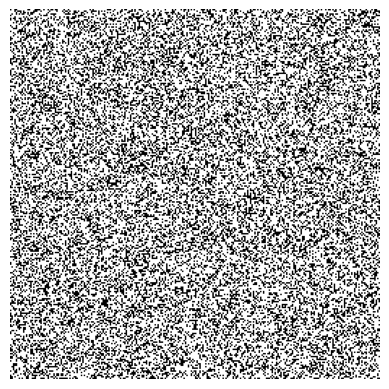

In [3]:
red = armar_red(256, 0.35)

plt.imshow(red, cmap='gray')
plt.axis('off')

2)

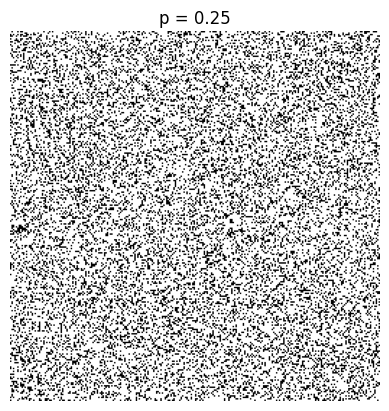

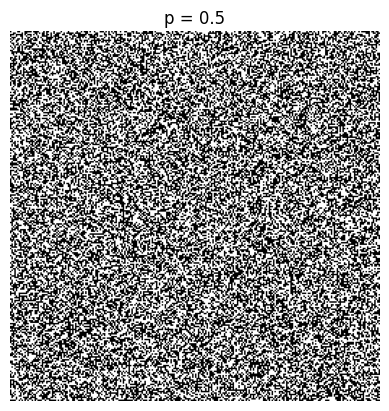

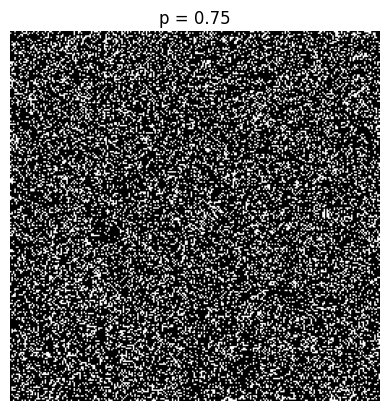

In [33]:
ps = [0.25, 0.5, 0.75]

for p in ps:
    red = armar_red(256, p)
    plt.figure()
    plt.imshow(red, cmap='gray')
    plt.axis('off')
    plt.title(f'p = {p}')

3.

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_5224\2457905354.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Paired')


Hay 1998 clusters en la red, el cluster mas grande tiene 12918 elementos


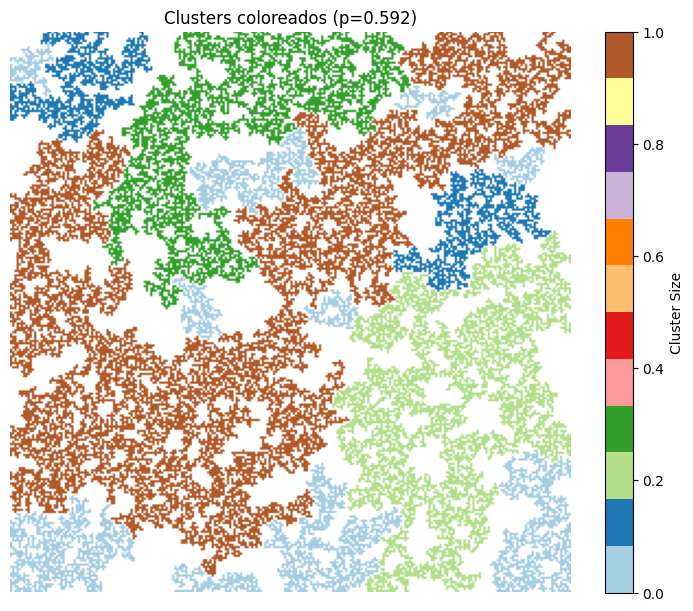

In [67]:
size = 256
p = 0.592

graficar_clusters(size, p)

Depende la semilla se ven entre de 1 a 10 clusters grandes, los clusters chiquititos directamente no los estoy graficando.

4.

In [49]:
probs = list(np.linspace(0.3, 0.55, 10)) + list(np.linspace(0.56, 0.65, 30)) + list(np.linspace(0.66, .85, 10))

mayor_cluster_mean = []
mayor_cluster_std = []
ocupacion = []
muchos_clusters = {p:[] for p in probs}


size = 256
reps = 10

for i, p in enumerate(probs):
    print(f"Iteracion {i+1}/{len(probs)}", end='\r')
    
    mayor_cluster_aux = []
    ocupacion_aux = []
    
    for rep in range(reps):
        red = armar_red(size, p)
        clusters = lista_clusters(red)
        clusters_sizes = [len(cluster) for cluster in clusters]

        muchos_clusters[p].append(clusters_sizes)
        
        mayor_cluster_aux.append(max(len(cluster) for cluster in clusters))
        # Cuento la cantidad de ocupacion (sitios negros)
        ocupacion_aux.append(size**2 - np.sum(red))

    mayor_cluster_mean.append(np.mean(mayor_cluster_aux)) 
    mayor_cluster_std.append(np.std(mayor_cluster_aux))
    ocupacion.append(np.mean(ocupacion_aux))

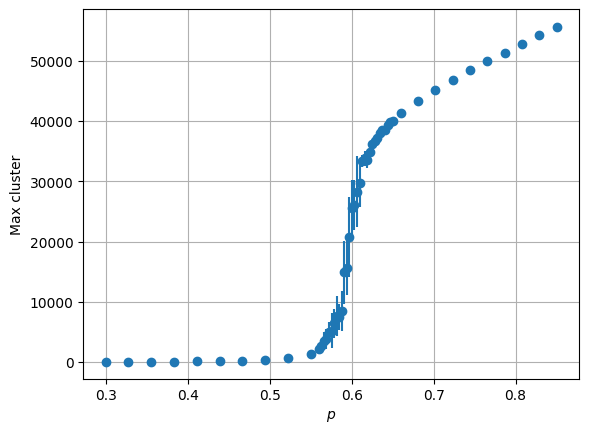

In [50]:
plt.errorbar(probs, mayor_cluster_mean, yerr=mayor_cluster_std, fmt='o')
plt.xlabel(r'$p$')
plt.ylabel('Max cluster')
plt.grid()

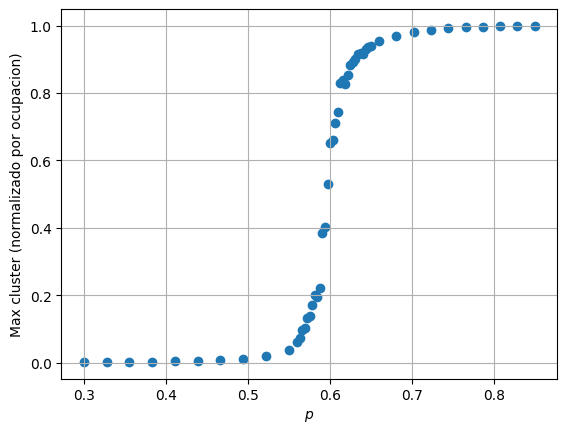

In [55]:
mayor_cluster_norm = [mayor_cluster_mean[i] / ocupacion[i] for i in range(len(mayor_cluster_mean))]

plt.scatter(probs, mayor_cluster_norm, marker='o')
plt.xlabel(r'$p$')
plt.ylabel('Max cluster (normalizado por ocupacion)')
plt.grid()

5.

In [6]:
probs = [0.3, 0.59, 0.7]
reps = 10

clusters_dict = {p:[] for p in probs}
size = 512

for i, p in enumerate(probs):
    print(f"Iteracion {i+1}/{len(probs)}", end='\r')

    for rep in range(reps):
        red = armar_red(size, p)
        clusters = lista_clusters(red)

        cluster_lens = [len(cluster) for cluster in clusters]

        clusters_dict[p].append(cluster_lens)

    # Pongo todos los elementos en una lista (estaban en una lista de listas)
    clusters_dict[p] = [elem for sublist in clusters_dict[p] for elem in sublist]


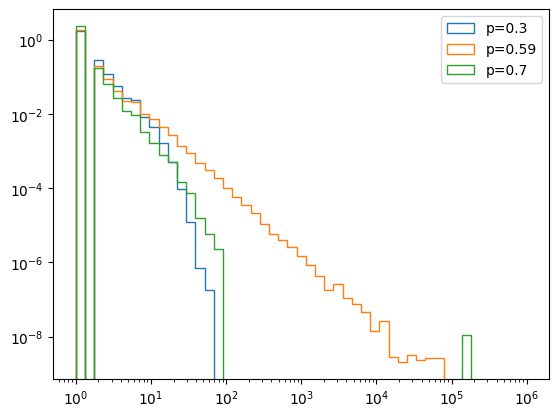

In [7]:
bins = np.logspace(0, 6, 50)

plt.hist(clusters_dict[0.3], bins=bins, density=True, histtype='step', label='p=0.3');
plt.hist(clusters_dict[0.59], bins=bins, density=True, histtype='step', label='p=0.59');
plt.hist(clusters_dict[0.7], bins=bins, density=True, histtype='step', label='p=0.7');
plt.xscale('log')
plt.yscale('log')

plt.legend()

Para calcular el exponente critico mejor voy a usar la distribución acumulada. REVISAR

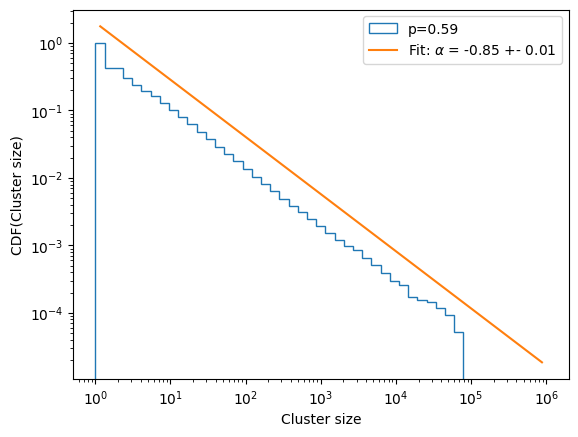

In [43]:
counts, bins, _ = plt.hist(clusters_dict[0.59], bins=bins, density=True, cumulative=-1, histtype='step', label='p=0.59');
# x: punto medio de los bins
x = (bins[1:] + bins[:-1]) / 2

# Ajusto una recta en el logaritmo de los datos
popt, pcov = np.polyfit(np.log(x[counts>0]), np.log(counts[counts>0]), 1, cov=True)
plt.plot(x, np.exp(popt[1]+1) * x**popt[0], label=r'Fit: $\alpha$ 'f'= {popt[0]:.2f} +- {np.sqrt(pcov[0,0]):.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cluster size')
plt.ylabel('CDF(Cluster size)')
plt.legend()


El exponente de la acumulada me da 0.85, así que el exponente de la distribución de clusters es 1.85, que es lo que esperábamos

6.

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_5224\2457905354.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Paired')


Hay 8765 clusters en la red, el cluster mas grande tiene 12228 elementos


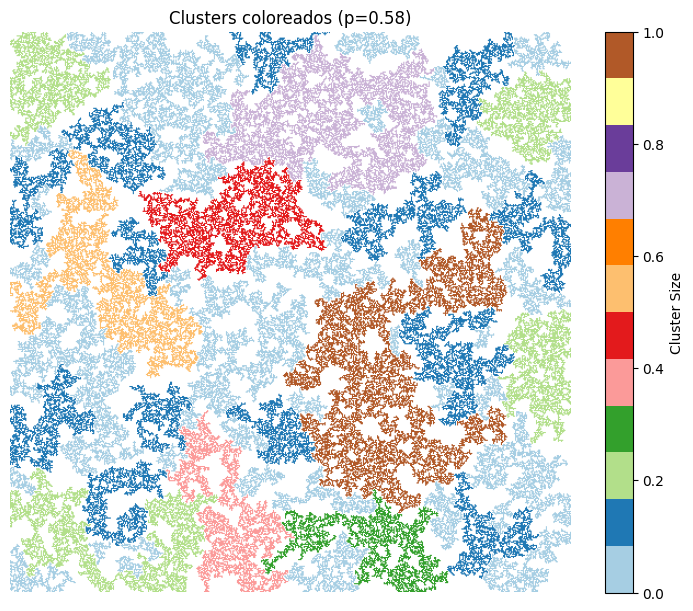

Hay 7452 clusters en la red, el cluster mas grande tiene 44876 elementos


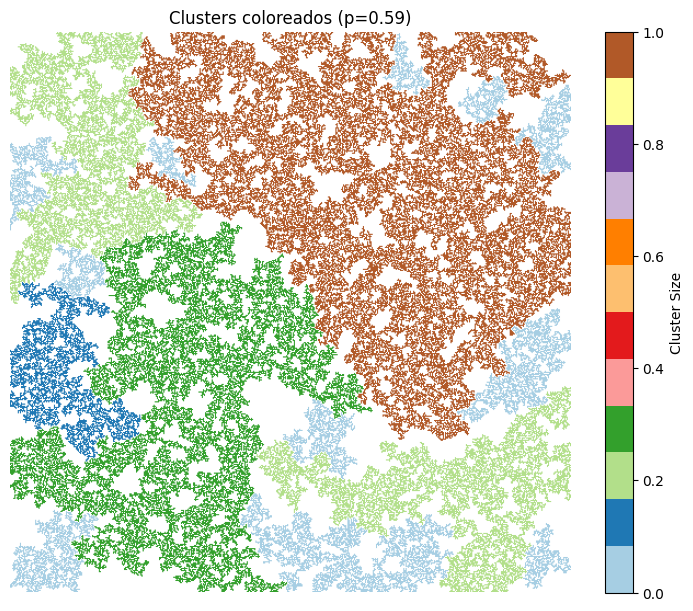

Hay 2241 clusters en la red, el cluster mas grande tiene 176924 elementos


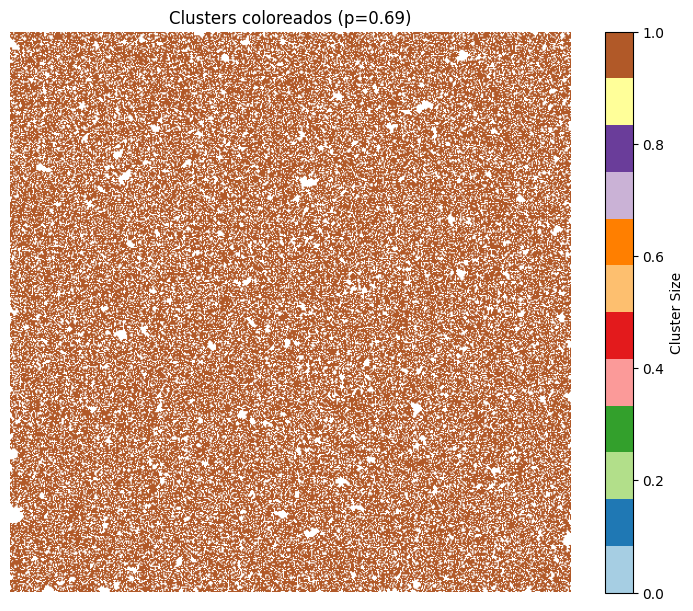

In [69]:
probs = [0.58, 0.59, 0.69]
size = 512

for p in probs:
    graficar_clusters(size, p)

7. De memoria: $p_{crit} = 1$ para 1D, ya que cualquier huequito ($p<1$) te divide el cluster más grande en dos.